In [3]:
from stpy.continuous_processes.gauss_procc import GaussianProcess
from stpy.continuous_processes.fourier_fea import GaussianProcessFF
from stpy.continuous_processes.kernelized_features import KernelizedFeatures
from stpy.kernels import KernelFunction
from stpy.embeddings.embedding import HermiteEmbedding,RFFEmbedding 
import stpy
import torch
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import stpy.test_functions
import stpy.test_functions.benchmarks
import stpy.test_functions.test_functions

from stpy.test_functions.test_functions import test_function

n = 1024
N = 512
gamma = 0.1
s = 0.01
#benchmark = stpy.test_functions.benchmarks.GaussianProcessSample(d =1, gamma = gamma, sigma = s, n = n)
# benchmark = stpy.test_functions.benchmarks.Simple1DFunction(d = 1, sigma = s)
benchmark = stpy.test_functions.benchmarks.Simple1DFunction(d = 1, s = s)

x = benchmark.initial_guess(N, adv_inv = True)
y = benchmark.eval(x)
xtest = benchmark.interval(1024)

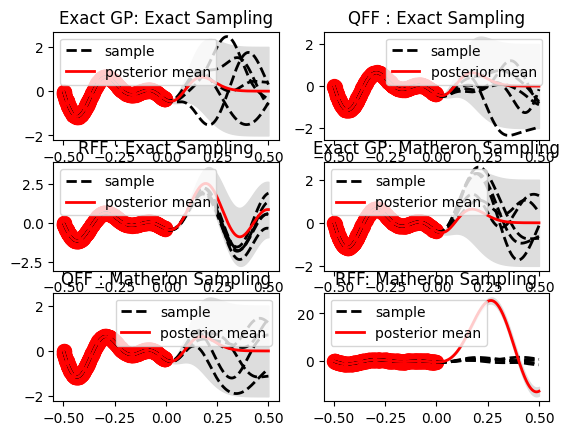

In [10]:
GP = GaussianProcess(gamma = gamma, s = s)
GP.fit_gp(x,y)
plt.subplot(3,2,1)
plt.title("Exact GP: Exact Sampling")
GP.visualize(xtest, fig = False, show = False, size = 5)



m = 64

kernel = KernelFunction(gamma = gamma)
embedding = HermiteEmbedding(gamma = gamma, m = m)
RFF = KernelizedFeatures(embedding=embedding, s = s, m = m)
RFF.fit_gp(x,y) 
plt.subplot(3,2,2)
plt.title("QFF : Exact Sampling")
RFF.visualize(xtest, fig = False, show = False, size = 5)




m = 64
kernel = KernelFunction(gamma = gamma)
embedding = RFFEmbedding(gamma = gamma, m = m)
RFF = KernelizedFeatures(embedding=embedding, s = s, m = m)
RFF.fit_gp(x,y) 

plt.subplot(3,2,3)
plt.title("RFF : Exact Sampling")
RFF.visualize(xtest, fig = False, show = False, size = 5)


GP = GaussianProcess(gamma = gamma, s = s)
GP.fit_gp(x,y)
plt.subplot(3,2,4)
plt.title("Exact GP: Matheron Sampling")
GP.visualize(xtest, fig = False, show = False, size = 5)


kernel = KernelFunction(gamma = gamma)
embedding = HermiteEmbedding(gamma = gamma, m = m)
RFF = KernelizedFeatures(embedding=embedding, s = s, m = m)
RFF.fit_gp(x,y) 
plt.subplot(3,2,5)
plt.title("QFF : Matheron Sampling")
RFF.visualize(xtest,fig = False, show = False, size = 5, matheron_kernel = kernel)




m = 64
kernel = KernelFunction(gamma = gamma)
embedding = RFFEmbedding(gamma = gamma, m = m)
RFF = KernelizedFeatures(embedding=embedding, s = s, m = m)
RFF.fit_gp(x,y) 

plt.subplot(3,2,6)
plt.title("RFF: Matheron Sampling")
RFF.visualize(xtest, fig = False, show = False, size = 5, matheron_kernel = kernel)



In [6]:
Z = torch.inverse(GP.K)
Z

tensor([[ 9.7962e+03,  4.1507e+01, -4.5215e+01,  ..., -5.8767e+00,
          3.4139e+01,  4.0143e+01],
        [ 4.1507e+01,  9.5522e+03, -1.4804e+01,  ..., -7.3018e+00,
          3.9698e+00, -6.3558e+00],
        [-4.5215e+01, -1.4804e+01,  9.8363e+03,  ..., -7.7315e+00,
         -3.3433e+01, -8.8342e+01],
        ...,
        [-5.8767e+00, -7.3018e+00, -7.7315e+00,  ...,  9.8181e+03,
          3.3611e+01,  3.4853e+01],
        [ 3.4139e+01,  3.9698e+00, -3.3433e+01,  ...,  3.3611e+01,
          9.8438e+03, -1.4331e+02],
        [ 4.0143e+01, -6.3558e+00, -8.8342e+01,  ...,  3.4853e+01,
         -1.4331e+02,  9.8358e+03]], dtype=torch.float64)